In [170]:
from math import floor
import numpy as np
from numpy import matlib
import matplotlib.pyplot as plt
from scipy import signal

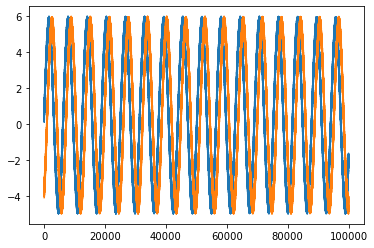

In [171]:
t = np.linspace(0,100, 100000)
trace1 = 5*np.sin(t) + np.random.random(size = len(t))
trace2 = 5*np.sin(t-1) + np.random.random(size = len(t))
plt.plot(trace1)
plt.plot(trace2)

In [172]:
sam_freq = 100
wl = sam_freq*10
ol = 0.5*wl
time_step = int(wl-ol)
num_windows = int(len(trace1)/time_step)
N = time_step * num_windows

In [173]:
trace1.shape

(100000,)

In [174]:
trace1 = trace1[0:N+1].reshape(time_step, num_windows)
trace2 = trace2[0:N+1].reshape(time_step, num_windows)

In [175]:
trace1.shape

(500, 200)

In [176]:
if round(wl/time_step) != wl/time_step:
    print('window length must be an integer multiple of time steps... exiting')
else:
    for k in range(2,int(wl/time_step)+1):
        trace1 = np.vstack((trace1, np.roll(trace1, -k+1, axis = 1)))
        trace2 = np.vstack((trace2, np.roll(trace2, -k+1, axis = 1)))

In [177]:
trace1.shape

(1000, 200)

In [178]:
HANN = matlib.repmat(signal.windows.hann(wl), 1, num_windows)

In [179]:
signal.windows.hann(10)[:, np.newaxis]

array([[0.        ],
       [0.11697778],
       [0.41317591],
       [0.75      ],
       [0.96984631],
       [0.96984631],
       [0.75      ],
       [0.41317591],
       [0.11697778],
       [0.        ]])

In [180]:
HANN = matlib.repmat(signal.windows.hann(wl)[:, np.newaxis], 1, wl)

In [183]:
HANN.shape

(1000, 1000)

In [184]:
trace1 * HANN

ValueError: operands could not be broadcast together with shapes (1000,200) (1000,1000) 